<img src="https://www.eurecom.fr/sites/all/themes/eurecom/images/home/EURECOM_logo_250x118.png">


<br>
<p><font size="5">  MAchine Learning and Intelligent System  </font></p>
<p><font size="5">  Road Signs Classification with Machine Learning </font></p>
<br>
<center>
<p><font size="4"> Name & SURNAME : Adib RACHID & Mokhles BOUZAIEN</font></p>
</center>

# Introduction
A car company’s commercial project would be a combination of detection and classification of road signs inside the car software. This project is highly recommended for autonomous cars and even to automate some car functions such as alerting drivers on a limit speed or other road signs. 
However, in this project, the objective will be to work on only classifying road signs into their correct classes ex: speed limit, no stopping, no entry, etc. The difficulty can increase by knowing more information about these classes ex: speed limit value, maximum height value, etc. and then, by detecting the road signs as a further step. This problem can be considered as a computer vision problem so deep learning may be required to solve the classification in order to extract features from the images and use them to correctly classify the image to its exact class.

In [1]:
# IMPORTS

from __future__ import absolute_import, division, print_function, unicode_literals

import utils
import preprocessing as pre
import numpy as np
import time
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from pathlib import Path
import cv2
import NN as nn

# Exploring Data

The first step, is to explore the data we are going to use, i.e. the total number of classes, the number of training samples and the number of testing samples.<br>
Then, we will create two dataset instances using the Dataset class defined in the NN module.

In [2]:
# Get information about data

data_dir = "data"
train_data_dir, train_labels_path = "data/gtsrb-german-traffic-sign/Train", "data/gtsrb-german-traffic-sign/Train.csv"
test_data_dir, test_labels_path = "data/gtsrb-german-traffic-sign/Test", "data/gtsrb-german-traffic-sign/Test.csv"

utils.data_info(data_dir, train_data_dir, test_data_dir)

total classes 43
total train 39209
total test 12630


In [3]:
# Create training and testing datasets

train_data_set = nn.Dataset(train_data_dir, train_labels_path, data='train')
test_data_set = nn.Dataset(test_data_dir, test_labels_path, data='test')

In [4]:
# Class labels

classes = np.unique(train_data_set.labels)
print(classes)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [5]:
# Retrieve the metadata such as the sign corresponding to each class

meta_data_dir = Path("data/gtsrb-german-traffic-sign/Meta")
meta_data_set = []
for _class in classes:
    img_path = meta_data_dir/(str(_class) + ".png")
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    meta_data_set.append(img)

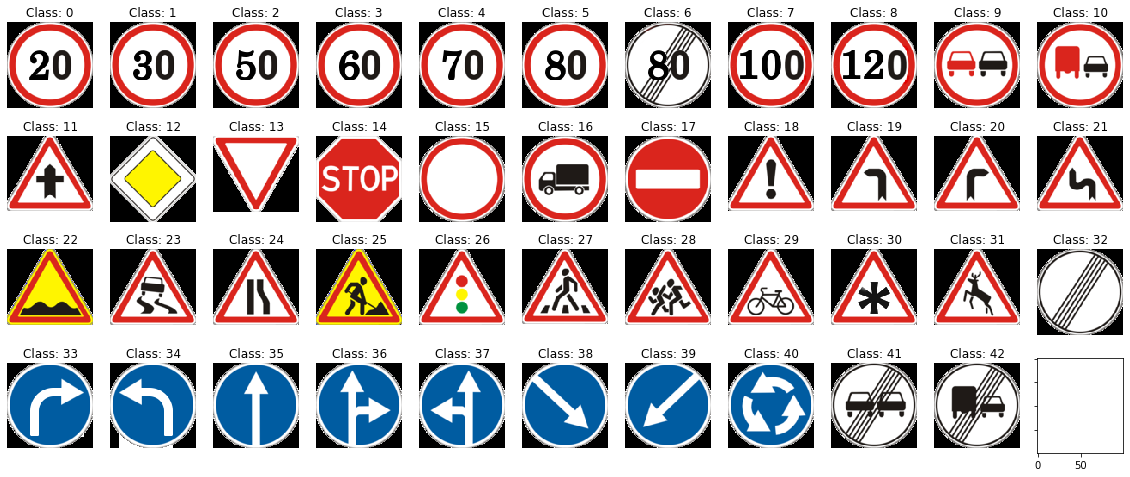

In [6]:
# Plot different classes

fig, axes = plt.subplots(4, 11, sharex=True, sharey=True, figsize=(20,8))
axes = axes.flatten()
for img, _class, ax in zip(meta_data_set, classes, axes):
    ax.imshow(img)
    ax.axis('off')
    ax.set_title("Class: " + str(_class))
plt.show()

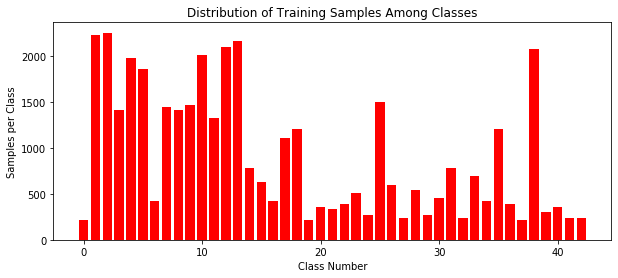

In [7]:
# Let's have a look at the distribution of the data though the differents classes
# This will be useful later ...

utils.classDistribution(train_data_set.labels)

Text(0.5, 1.0, 'Distribution of Image Sizes of The Testing Dataset')

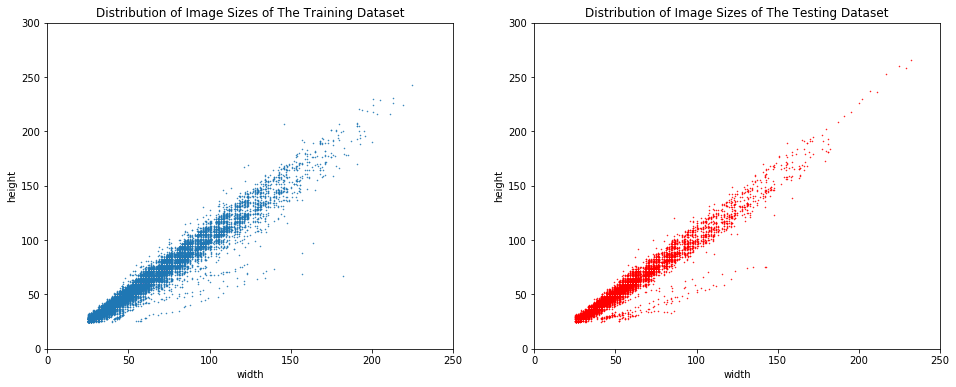

In [8]:
# To explore the data in more details, we choose to represent each image width and height on a scatter plot

ws_train, hs_train = list(), list()
ws_test, hs_test = list(), list()
for img in train_data_set.X:
    ws_train.append(img.shape[0])
    hs_train.append(img.shape[1])
for img in test_data_set.X:
    ws_test.append(img.shape[0])
    hs_test.append(img.shape[1])

plt.figure(figsize=(16, 6))

plt.subplot(121)
plt.scatter(ws_train, hs_train, s=1, marker='.')
plt.xlabel('width')
plt.ylabel('height')
plt.xlim(0, 250)
plt.ylim(0, 300)
plt.title('Distribution of Image Sizes of The Training Dataset')

plt.subplot(122)
plt.scatter(ws_test, hs_test, s=1, marker='.', c='r')
plt.xlabel('width')
plt.ylabel('height')
plt.xlim(0, 250)
plt.ylim(0, 300)
plt.title('Distribution of Image Sizes of The Testing Dataset')

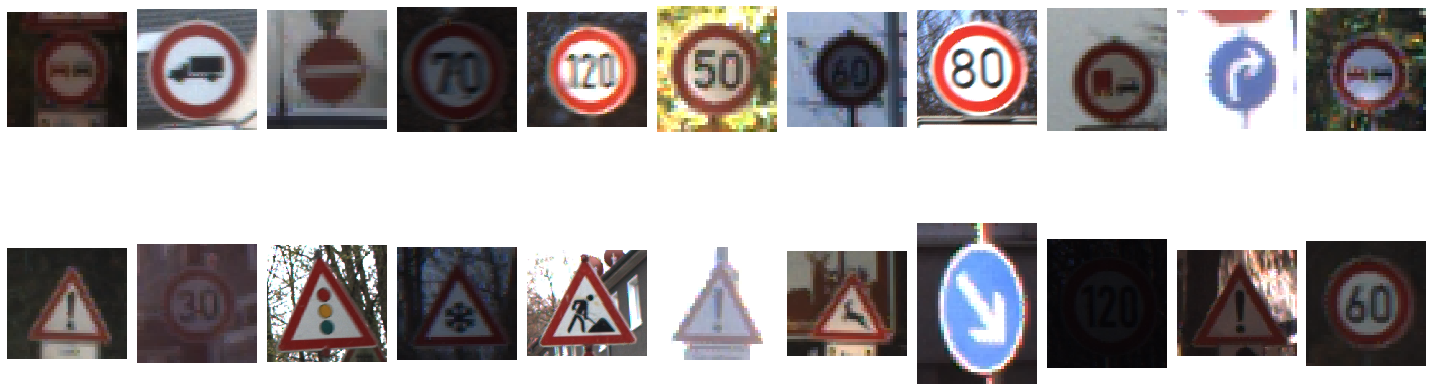

In [9]:
# Randomly pick and show 22 images from the tarining data

random.seed(8)
rand_imgs = random.sample(list(train_data_set.X), 22)
utils.plotImages(rand_imgs)

# Data Preprocessing

In [10]:
# Rshaping to 32x32 images and converting to grayscale

reshaped_train_images = []
for image in train_data_set.X:
    dst = pre.eqHist(image)
    dst = pre.reshape(dst, 32)
    reshaped_train_images.append(dst)
train_data_set.X = reshaped_train_images

reshaped_test_images = []
for image in test_data_set.X:
    dst = pre.eqHist(image)
    dst = pre.reshape(dst, 32)
    reshaped_test_images.append(dst)
test_data_set.X = reshaped_test_images

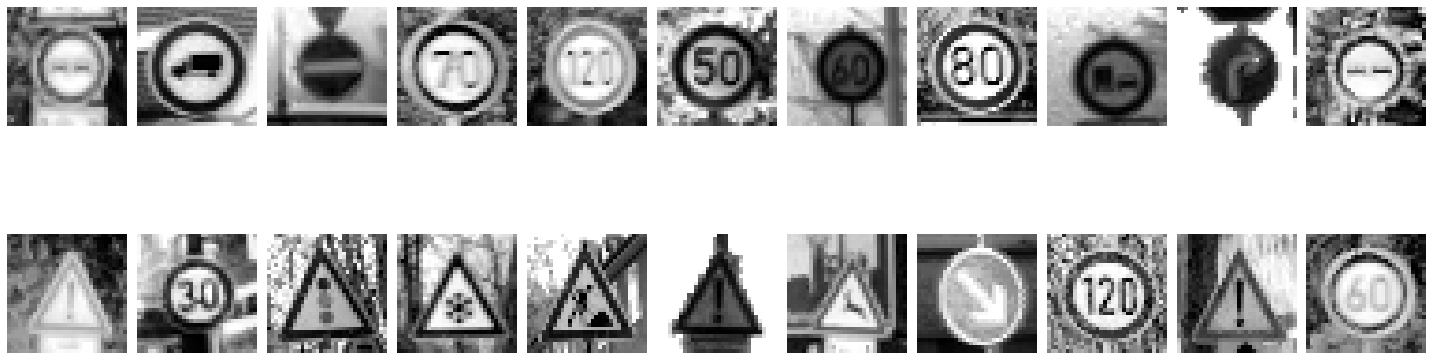

In [11]:
# Now, all samples have the same size

random.seed(8)
utils.plotImages(random.sample(train_data_set.X, 22), cmap='gray')

# Training a NN model

For this model, the input is a $d\times1$ vector containing the values of the image pixels (from 0 to 255 before normalization). 

In [12]:
reshaped_train_images = []
for image in train_data_set.X:
    # convert each image to a vector
    dst = image.reshape(-1,1)
    reshaped_train_images.append(dst)
# normalize in order to get values between 0 and 1
train_data_set.X = np.asarray(reshaped_train_images) / 255.

In [13]:
reshaped_test_images = []
for image in test_data_set.X:
    # convert each image to a vector
    dst = image.reshape(-1,1)
    reshaped_test_images.append(dst)
# normalize in order to get values between 0 and 1
test_data_set.X = np.asarray(reshaped_test_images) / 255.

In [14]:
# Create the MLP model

mlp = nn.MLP("NN.dat", train_data_set, print_step=1, verbose=1)

In [ ]:
# TRAINING THIS MODEL COULD LAST FOR HOURS

mlp.train(n_epochs=5, learning_rate=1, decay=1.)

In [ ]:
mlp.make_plot()

In [ ]:
mlp.setdataset(test_data_set)

In [ ]:
mlp.print_accuracy()

# Training a CNN model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras import optimizers

In [16]:
# Linear stack of layers.
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',
                 input_shape=(32, 32, 1))) # the input samples are images of size 32*32 with one channel
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(43, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

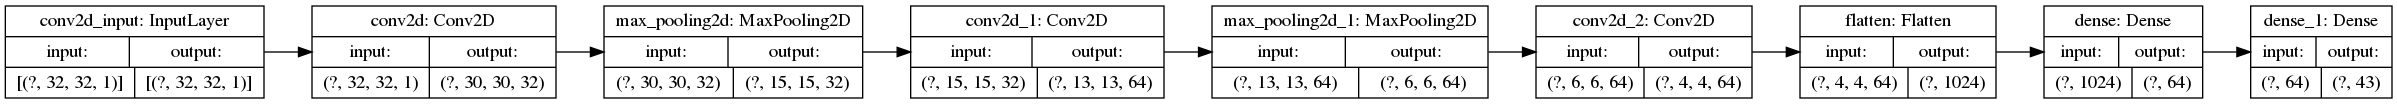

In [20]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='images/model.png', show_shapes=True, rankdir='LR')

In [21]:
train_data_set.X.shape

(39209, 1024, 1)

In [22]:
train_data_set.X = train_data_set.X.reshape(-1,32,32,1)# / 255.0
test_data_set.X = test_data_set.X.reshape(-1,32,32,1)# / 255.0

In [23]:
new_y = list()
for y in train_data_set.y:
    new_y.append(np.argmax(y))
new_y = np.asarray(new_y).reshape(-1,1)

In [24]:
new_y_test = list()
for y in test_data_set.y:
    new_y_test.append(np.argmax(y))
new_y_test = np.asarray(new_y_test).reshape(-1,1)

In [25]:
train_data_set.X.shape, new_y.shape

((39209, 32, 32, 1), (39209, 1))

In [26]:
model.compile(optimizer=optimizers.RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data_set.X, new_y, validation_split=0.25, epochs=10)

Train on 29406 samples, validate on 9803 samples
Epoch 1/10
29406/29406 [==============================] - 24s 816us/sample - loss: 0.9651 - accuracy: 0.7198 - val_loss: 27.1570 - val_accuracy: 0.0568
Epoch 2/10
29406/29406 [==============================] - 22s 746us/sample - loss: 0.1340 - accuracy: 0.9606 - val_loss: 27.8668 - val_accuracy: 0.0557
Epoch 3/10
29406/29406 [==============================] - 22s 736us/sample - loss: 0.0661 - accuracy: 0.9813 - val_loss: 24.1913 - val_accuracy: 0.0541
Epoch 4/10
29406/29406 [==============================] - 22s 764us/sample - loss: 0.0380 - accuracy: 0.9886 - val_loss: 30.2046 - val_accuracy: 0.0563
Epoch 5/10
29406/29406 [==============================] - 23s 794us/sample - loss: 0.0263 - accuracy: 0.9921 - val_loss: 28.2901 - val_accuracy: 0.0568
Epoch 6/10
29406/29406 [==============================] - 27s 932us/sample - loss: 0.0173 - accuracy: 0.9948 - val_loss: 34.7405 - val_accuracy: 0.0556
Epoch 7/10
29406/29406 [===============

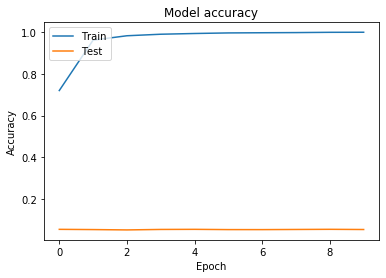

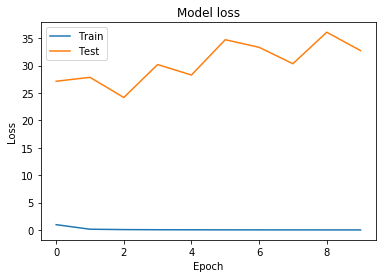

In [27]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [28]:
model.metrics_names

['loss', 'accuracy']

In [29]:
loss_and_metrics = model.evaluate(test_data_set.X, new_y_test, verbose=0)

In [30]:
loss_and_metrics

[8.373822529053555, 0.73198736]

In [31]:
# Data augmentation: generate fake data from the existing images

fake_data_dir, fake_labels_path = "data/gtsrb-german-traffic-sign/augmented/train", "data/gtsrb-german-traffic-sign/augmented/Train_augmented.csv"
fake_data_set = nn.Dataset(fake_data_dir, fake_labels_path, data='augmented', n_samples=30000)

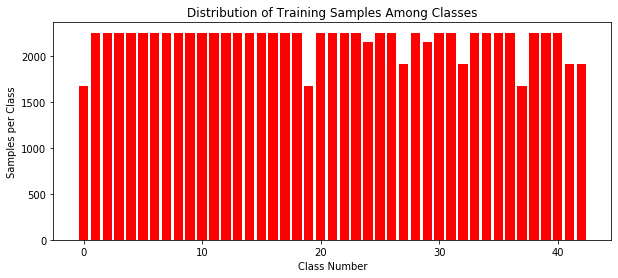

In [32]:
utils.classDistribution(fake_data_set.labels)

In [33]:
# Rshaping to 32x32 images and converting to grayscale

reshaped_fake_images = []
for image in fake_data_set.X:
    dst = pre.eqHist(image)
    dst = pre.reshape(dst, 32)
    reshaped_fake_images.append(dst)
fake_data_set.X = reshaped_fake_images

In [34]:
# normalize in order to get values between 0 and 1
fake_data_set.X = np.asarray(fake_data_set.X).reshape(-1,32,32,1) / 255.

In [35]:
new_fake_y = list()
for y in fake_data_set.y:
    new_fake_y.append(np.argmax(y))
new_fake_y = np.asarray(new_fake_y).reshape(-1,1)

In [36]:
# Linear stack of layers.
model_2 = Sequential()
model_2.add(Conv2D(32, (3,3), activation='relu',
                 input_shape=(32, 32, 1))) # the input samples are images of size 32*32 with one channel
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(43, activation='softmax'))

In [37]:
model_2.compile(optimizer=optimizers.RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_2 = model_2.fit(fake_data_set.X, new_fake_y, validation_split=0.25, epochs=10)

Train on 22500 samples, validate on 7500 samples
Epoch 1/10
22500/22500 [==============================] - 17s 745us/sample - loss: 1.1806 - accuracy: 0.6726 - val_loss: 0.3273 - val_accuracy: 0.8951
Epoch 2/10
22500/22500 [==============================] - 16s 721us/sample - loss: 0.1688 - accuracy: 0.9496 - val_loss: 0.1725 - val_accuracy: 0.9475
Epoch 3/10
22500/22500 [==============================] - 18s 796us/sample - loss: 0.0664 - accuracy: 0.9792 - val_loss: 0.0559 - val_accuracy: 0.9839
Epoch 4/10
22500/22500 [==============================] - 19s 826us/sample - loss: 0.0344 - accuracy: 0.9899 - val_loss: 0.0527 - val_accuracy: 0.9844
Epoch 5/10
22500/22500 [==============================] - 17s 746us/sample - loss: 0.0221 - accuracy: 0.9932 - val_loss: 0.0460 - val_accuracy: 0.9867
Epoch 6/10
22500/22500 [==============================] - 18s 795us/sample - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.0351 - val_accuracy: 0.9897
Epoch 7/10
22500/22500 [=====================

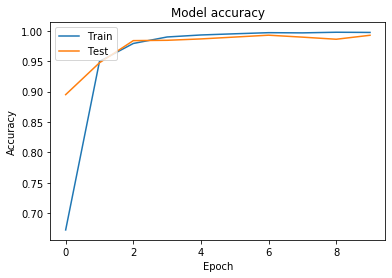

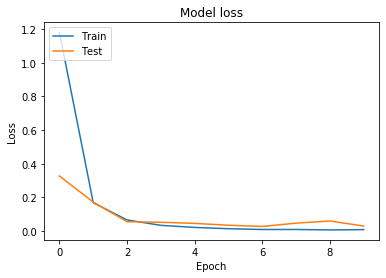

In [38]:
# Plot training & validation accuracy values
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [39]:
loss_and_metrics_2 = model_2.evaluate(test_data_set.X, new_y_test, verbose=0)

In [40]:
loss_and_metrics_2

[1.5791984968872554, 0.83032465]